# **Data Description:**

You can get data from Kaggle : https://www.kaggle.com/datasets/jamesvandenberg/renewable-power-generation/data

We have multiple datasets provided: Energy generation (TWH) by Continent and Country, along with renewable and non-renewable energy generation by continent and country. However, the renewable energy data is only available from the year 1997 to 2017.

**Objectives:**

Look into the different energy datasets for the years 1997 to 2017
Clean and organize the datasets into more analyzable forms
Perform EDA on each to discover trends and patterns
join datasets to find more insights by EDA
Use Classification and regression algorithms on different columns of data. This includes:
Feature Selection
Feature Engineering
Comparison between multiple techniques
Predictions (where applicable)

**Inspiration:**

Which types of renewables are improving the fastest? Which countries using which types of renewables? At the increasing rate of returns on renewables, how long will it take to meet global demands and eliminate non-renewables, or atleast, break 50%?

**Data Dictionary**

1)The OECD: The Organisation for Economic Co-operation and Development (OECD) is a key international standard-setting organisation which conducts valuable independent analysis and statistics on a range of economic and other policy areas and it consists of 38 member countries (Australia, Austria, Belgium, Canada, Chile, Colombia, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, South Korea, Latvia, Lithuania, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom, United States)


2)BRICS: Is an intergovernmental organization comprising nine countries: Brazil, Russia, India, China, South Africa. BRICS was originally identified to highlight investment opportunities.
(Iran, Egypt, Ethiopia, and the United Arab Emirates) Added recently so, we didn't include them.

3)CIS: The Commonwealth of Independent States (CIS) is a regional intergovernmental organization in Eurasia and it consists of 38 member countries(Armenia, Azerbaijan, Belarus, Kazakhstan, Kyrgyzstan, Moldova, Russia, Tajikistan, Turkmenistan, Uzbekistan)

4)TWh: Referes to Terawatt hour and it is a unit of energy used for expressing the amount of produced energy


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.subplots import make_subplots
import plotly.graph_objects as go


**Reading the data and saving as DataFrames**

In [ ]:
df_cont_cons = pd.read_csv("Continent_Consumption_TWH.csv")
df_country_cons = pd.read_csv("Country_Consumption_TWH.csv")
df_renewable = pd.read_csv("renewablePowerGeneration97-17.csv")
df_NONREN_totalP = pd.read_csv("nonRenewablesTotalPowerGeneration.csv")
df_REN_totalP= pd.read_csv("renewablesTotalPowerGeneration.csv")
dftop20 = pd.read_csv("top20CountriesPowerGeneration.csv")

In [ ]:
#describing, getting visual overview of data
df_cont_cons.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [ ]:
df_cont_cons.tail()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
26,2016,159377.52,61545.96,57742.95,21224.75,28563.28,9745.94,63941.74,1767.76,9106.29,8862.06,11595.11
27,2017,162459.47,61929.75,59429.30,21620.17,28563.28,9687.79,65721.13,1791.02,9304.00,9210.96,11792.82
28,2018,166297.37,62592.66,61673.89,21399.20,29470.42,9513.34,68035.50,1791.02,9559.86,9257.48,12385.95
29,2019,167553.41,61825.08,63255.57,21061.93,29249.45,9478.45,69582.29,1802.65,9641.27,9455.19,12490.62
30,2020,160819.64,57487.09,63162.53,19643.07,27063.01,8815.54,69256.65,1767.76,9408.67,9338.89,11804.45


In [ ]:
#checking for null values
df_cont_cons.isnull().sum()

,0
Year,0
World,0
OECD,0
BRICS,0
Europe,0
North America,0
Latin America,0
Asia,0
Pacific,0
Africa,0


In [ ]:
round(df_cont_cons.isna().mean() * 100 ,2)

,0
Year,0.0
World,0.0
OECD,0.0
BRICS,0.0
Europe,0.0
North America,0.0
Latin America,0.0
Asia,0.0
Pacific,0.0
Africa,0.0


In [ ]:
df_cont_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


In [ ]:
#Describe
df_cont_cons.describe(include='all')

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,132792.465484,60396.465806,41128.932258,21487.738065,28226.760323,7897.145161,45402.019355,1563.297097,6851.945806,5984.197742,11823.958387
std,9.092121,22724.116555,3480.622930,13849.968002,899.171139,1548.243608,1537.717304,15511.849313,205.509574,1742.659154,2245.547591,1410.089379
min,1990.000000,101855.540000,52602.490000,25993.050000,19643.070000,24667.230000,5373.060000,24574.190000,1186.260000,4407.770000,2581.860000,10152.990000
25%,1997.500000,111176.985000,58719.870000,27504.950000,20875.850000,27435.170000,6687.250000,31383.555000,1424.675000,5355.615000,4070.500000,11001.980000
50%,2005.000000,133582.180000,61545.960000,38169.660000,21480.610000,28598.170000,8059.590000,43693.910000,1570.050000,6652.360000,5675.440000,11606.740000
75%,2012.500000,154853.450000,62360.060000,55521.620000,21951.625000,29295.970000,9391.225000,60760.935000,1756.130000,8367.785000,8007.255000,12083.570000
max,2020.000000,167553.410000,64883.770000,63255.570000,23108.810000,30424.080000,9978.540000,69582.290000,1802.650000,9641.270000,9455.190000,16049.400000


In [ ]:
# Check duplicates
df_cont_cons.duplicated().sum()

0

In [ ]:
OECD = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'South Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']
BRICS = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
CIS = ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan']

In [ ]:
#the data is pretty clean, except we need to know that our analysis can be done in two sections:
# - by continent
# - by OCED/BRICS/CIS grouping


df1 = df_cont_cons.drop(['CIS','BRICS','OECD','Middle-East'],axis=1)
df2 = df_cont_cons[['Year','CIS','BRICS','OECD','Middle-East','World']]

cont_total = pd.DataFrame(df1.sum()).reset_index().drop([0,1]).reset_index(drop=True)
cont_total.columns = ['CONTINENT','Total Energy consumption (1990-2020)']

groups_total = pd.DataFrame(df2.sum()).reset_index().drop([0,4]).reset_index(drop=True)
groups_total.columns = ['GROUP','Total Energy consumption (1990-2020)']

In [ ]:
fig = make_subplots(rows=1,cols=2,subplot_titles = ('Continent','Group'),specs=[[{'type':'pie'},{'type':'pie'}]])

fig.add_trace(go.Pie(labels=cont_total['CONTINENT'],values = cont_total['Total Energy consumption (1990-2020)'],
                     textinfo='label+percent'),row=1,col=1)
fig.add_trace(go.Pie(labels=groups_total['GROUP'],values = groups_total['Total Energy consumption (1990-2020)'],
                    textinfo='label+percent'),row=1,col=2)
fig.update_layout(title_text='ENERGY CONSUMPTION TOTALS: 1990 TO 2020',title_x=0.50,title_y=0.97,paper_bgcolor='aliceblue',
                  title_font_size=20,title_font_family='Arial Bold')

fig.update_layout(shapes=[
    dict(type="rect",
         xref="paper", yref="paper",
         x0=-0.11, x1=1.215, y0=-0.22, y1=1.28,  #Coordinates for the entire figure
         line=dict(color="black", width=2),  #Border color and width
         fillcolor=None),
     dict(type="rect",
         xref="paper", yref="paper",
         x0=-0.5, x1=1.5, y0=1.15, y1=1.3,
         fillcolor="blanchedAlmond",
         layer="below",
         line_width=3,line_color='navy')
])

In [ ]:
df1.head()

,Year,World,Europe,North America,Latin America,Asia,Pacific,Africa
0,1990,101855.54,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77
1,1991,102483.56,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70
2,1992,102588.23,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22
3,1993,103646.56,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78
4,1994,104449.03,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19


In [ ]:
df1.corr()

,Year,World,Europe,North America,Latin America,Asia,Pacific,Africa
Year,1.000000,0.988369,0.183463,0.604957,0.960716,0.988270,0.969935,0.992480
World,0.988369,1.000000,0.206533,0.582328,0.974917,0.995081,0.964657,0.994334
Europe,0.183463,0.206533,1.000000,0.775905,0.312650,0.117802,0.355024,0.126926
North America,0.604957,0.582328,0.775905,1.000000,0.667050,0.518392,0.720188,0.538786
Latin America,0.960716,0.974917,0.312650,0.667050,1.000000,0.959990,0.980601,0.959596
Asia,0.988270,0.995081,0.117802,0.518392,0.959990,1.000000,0.948897,0.997425
Pacific,0.969935,0.964657,0.355024,0.720188,0.980601,0.948897,1.000000,0.953067
Africa,0.992480,0.994334,0.126926,0.538786,0.959596,0.997425,0.953067,1.000000


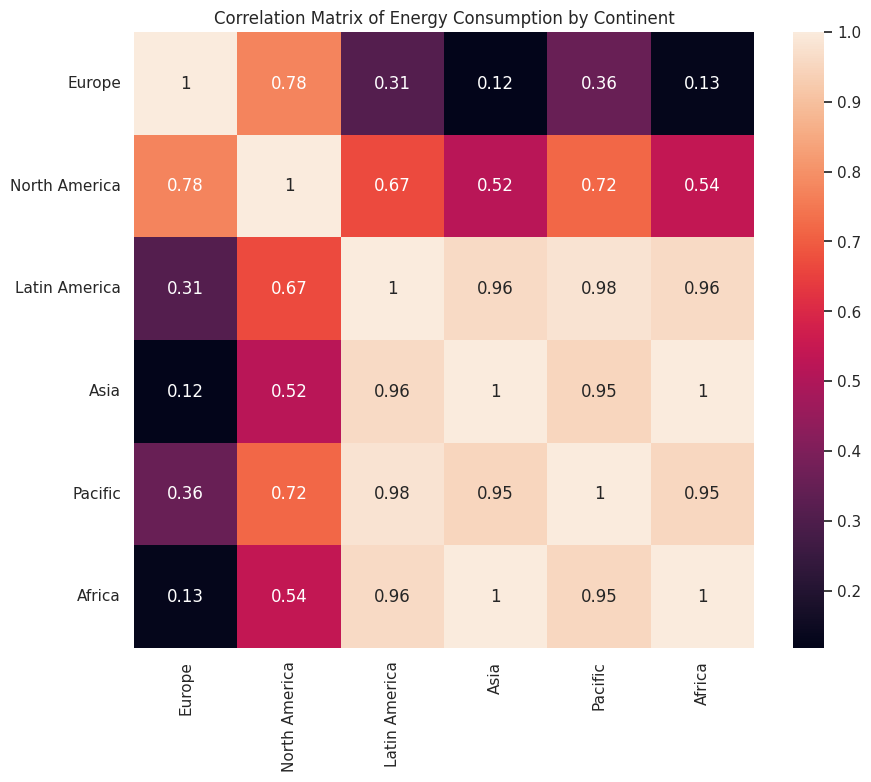

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df1[['Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa']].corr()
sns.heatmap(corr_matrix, annot=True)
Title = plt.title('Correlation Matrix of Energy Consumption by Continent')

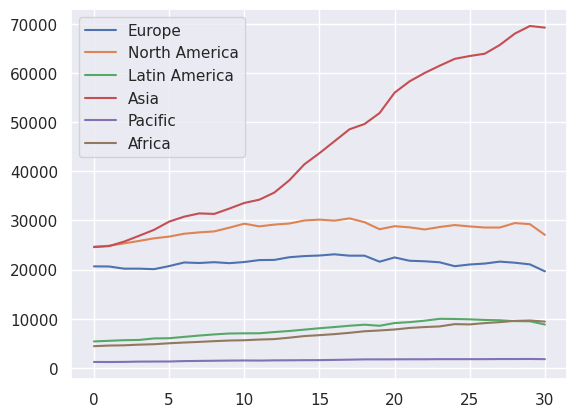

In [ ]:
df1[['Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa']].plot()
plt.show()

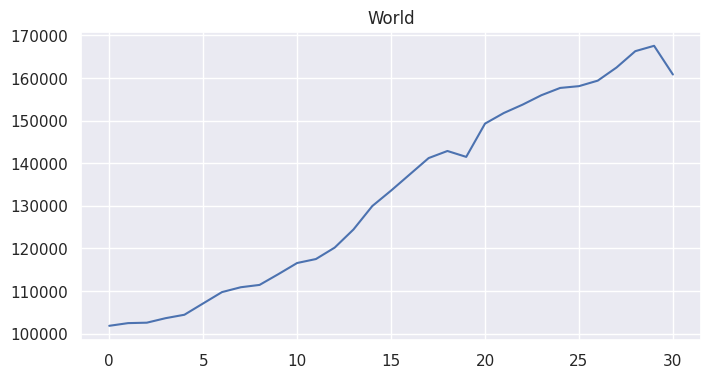

In [ ]:
df1['World'].plot(kind='line', figsize=(8, 4), title='World')
plt.show()

In [ ]:
df1.to_csv("Continent_Consumption_TWH Modified.csv")

In [ ]:
df2.head()

,CIS,BRICS,OECD,Middle-East
0,10,8,20,15
1,12,10,22,17
2,15,11,25,19
3,14,13,24,16
4,18,16,28,20


In [ ]:
df2.corr()

,Year,CIS,BRICS,OECD,Middle-East,World
Year,1.000000,-0.245438,0.969222,0.639695,0.992560,0.988369
CIS,-0.245438,1.000000,-0.036594,-0.605396,-0.181752,-0.148429
BRICS,0.969222,-0.036594,1.000000,0.488856,0.986791,0.985167
OECD,0.639695,-0.605396,0.488856,1.000000,0.579156,0.630131
Middle-East,0.992560,-0.181752,0.986791,0.579156,1.000000,0.992012
World,0.988369,-0.148429,0.985167,0.630131,0.992012,1.000000


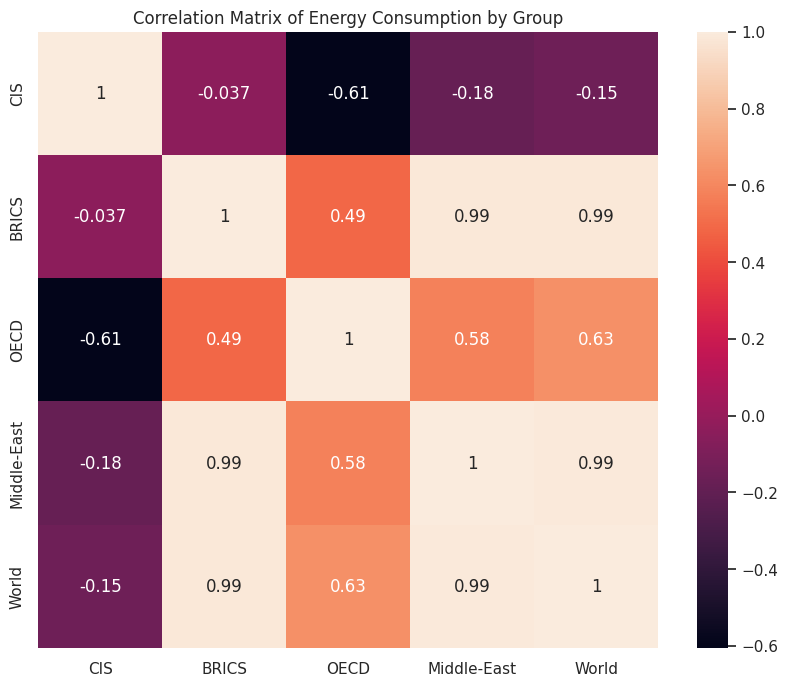

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df2[['CIS', 'BRICS', 'OECD', 'Middle-East', 'World']].corr()
sns.heatmap(corr_matrix, annot=True)
Title2= plt.title('Correlation Matrix of Energy Consumption by Group')

**Plotting**

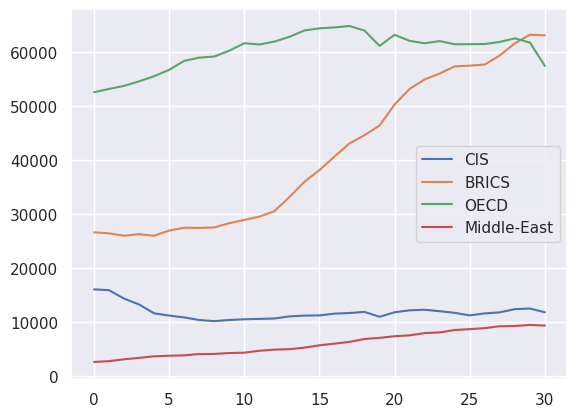

In [ ]:
df2[['CIS', 'BRICS', 'OECD', 'Middle-East']].plot()
plt.show()

In [ ]:
df2.to_csv("Groups_Consumption_TWH Modified.csv")

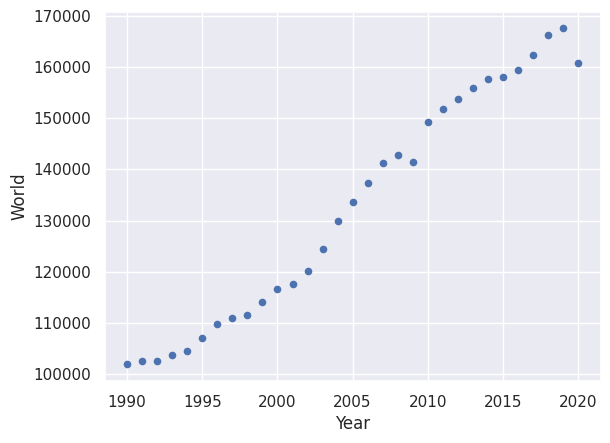

In [ ]:
df1.plot(kind = 'scatter', x = 'Year', y = 'World')
plt.show()

In [ ]:
df_country_cons.head()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [ ]:
df_country_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  31 non-null     float64
 1   China                 31 non-null     float64
 2   United States         31 non-null     float64
 3   Brazil                31 non-null     float64
 4   Belgium               31 non-null     float64
 5   Czechia               31 non-null     float64
 6   France                31 non-null     float64
 7   Germany               31 non-null     float64
 8   Italy                 31 non-null     float64
 9   Netherlands           31 non-null     float64
 10  Poland                31 non-null     float64
 11  Portugal              31 non-null     float64
 12  Romania               31 non-null     float64
 13  Spain                 31 non-null     float64
 14  Sweden                31 non-null     float64
 15  United Kingdom        31 

In [ ]:
df_country_cons['Year'] = df_country_cons['Year'].astype(str)
df_country_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  33 non-null     object 
 1   China                 31 non-null     float64
 2   United States         31 non-null     float64
 3   Brazil                31 non-null     float64
 4   Belgium               31 non-null     float64
 5   Czechia               31 non-null     float64
 6   France                31 non-null     float64
 7   Germany               31 non-null     float64
 8   Italy                 31 non-null     float64
 9   Netherlands           31 non-null     float64
 10  Poland                31 non-null     float64
 11  Portugal              31 non-null     float64
 12  Romania               31 non-null     float64
 13  Spain                 31 non-null     float64
 14  Sweden                31 non-null     float64
 15  United Kingdom        31 

In [ ]:
df_country_cons.describe()

,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1923.322581,2167.451613,223.451613,54.903226,43.258065,251.193548,327.903226,162.903226,74.870968,97.419355,...,112.645161,17.612903,37.258065,60.935484,108.967742,118.193548,169.064516,23.161290,138.387097,49.064516
std,898.856436,114.081503,55.459798,3.026052,2.190399,13.639207,18.396295,14.022256,3.981138,4.703008,...,14.985656,2.246144,13.750073,21.907283,31.859571,16.722080,64.863927,9.044692,53.969545,20.972896
min,848.000000,1910.000000,141.000000,48.000000,39.000000,217.000000,275.000000,137.000000,67.000000,89.000000,...,85.000000,14.000000,22.000000,33.000000,66.000000,88.000000,69.000000,3.000000,58.000000,20.000000
25%,1076.500000,2119.000000,181.000000,53.000000,42.000000,243.500000,313.000000,150.500000,72.000000,94.500000,...,102.500000,16.000000,24.500000,40.500000,79.500000,106.000000,110.000000,16.000000,91.000000,31.000000
50%,1782.000000,2191.000000,216.000000,56.000000,43.000000,252.000000,335.000000,162.000000,75.000000,98.000000,...,113.000000,17.000000,32.000000,62.000000,105.000000,120.000000,173.000000,25.000000,123.000000,44.000000
75%,2866.500000,2246.000000,284.000000,57.000000,45.000000,260.500000,340.000000,173.000000,77.500000,101.000000,...,126.500000,19.000000,48.000000,78.500000,141.500000,132.500000,220.000000,29.000000,188.500000,66.000000
max,3381.000000,2338.000000,303.000000,60.000000,50.000000,273.000000,351.000000,187.000000,83.000000,106.000000,...,129.000000,21.000000,65.000000,97.000000,160.000000,144.000000,269.000000,38.000000,219.000000,83.000000


In [ ]:
# Check duplicates
df_country_cons.duplicated().sum()

1

In [ ]:
# Check Missing Values
df_country_cons.isnull().sum()

,0
Year,0
China,2
United States,2
Brazil,2
Belgium,2
Czechia,2
France,2
Germany,2
Italy,2
Netherlands,2


In [ ]:
round(df_country_cons.isna().mean() * 100 ,2)

,0
Year,0.00
China,6.06
United States,6.06
Brazil,6.06
Belgium,6.06
Czechia,6.06
France,6.06
Germany,6.06
Italy,6.06
Netherlands,6.06


In [ ]:
df_country_cons = df_country_cons.dropna()
df_country_cons.isna().sum()


,0
Year,0
China,0
United States,0
Brazil,0
Belgium,0
Czechia,0
France,0
Germany,0
Italy,0
Netherlands,0


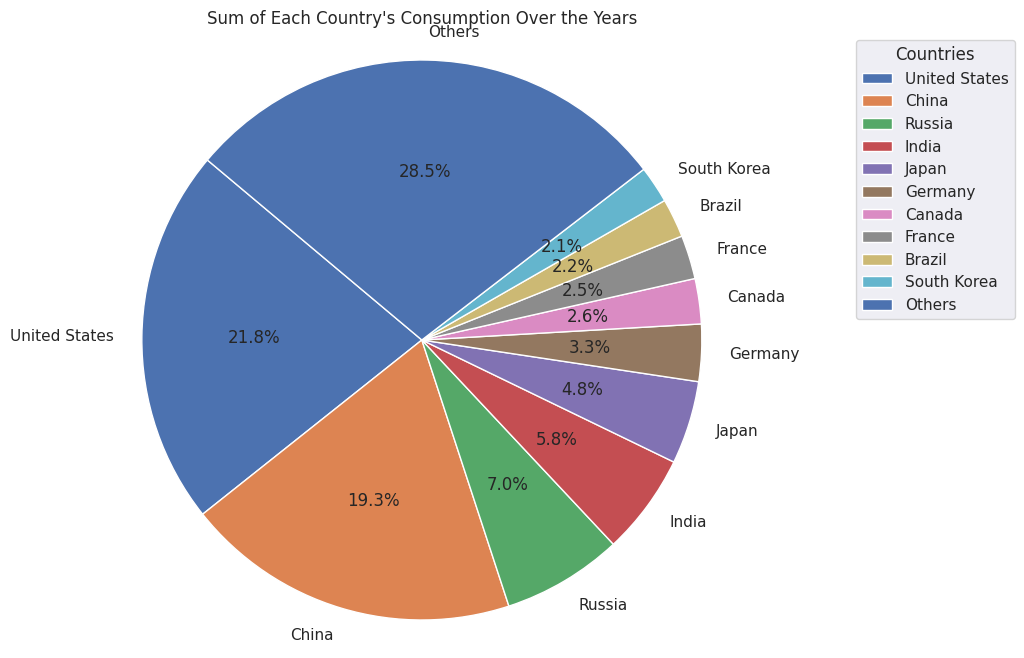

In [ ]:
country_sums = df_country_cons.drop(columns=['Year']).sum()

# Get the top 10 countries
top_countries = country_sums.nlargest(10)
others = country_sums.sum() - top_countries.sum()
top_countries['Others'] = others

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Sum of Each Country's Consumption Over the Years")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(top_countries.index, title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

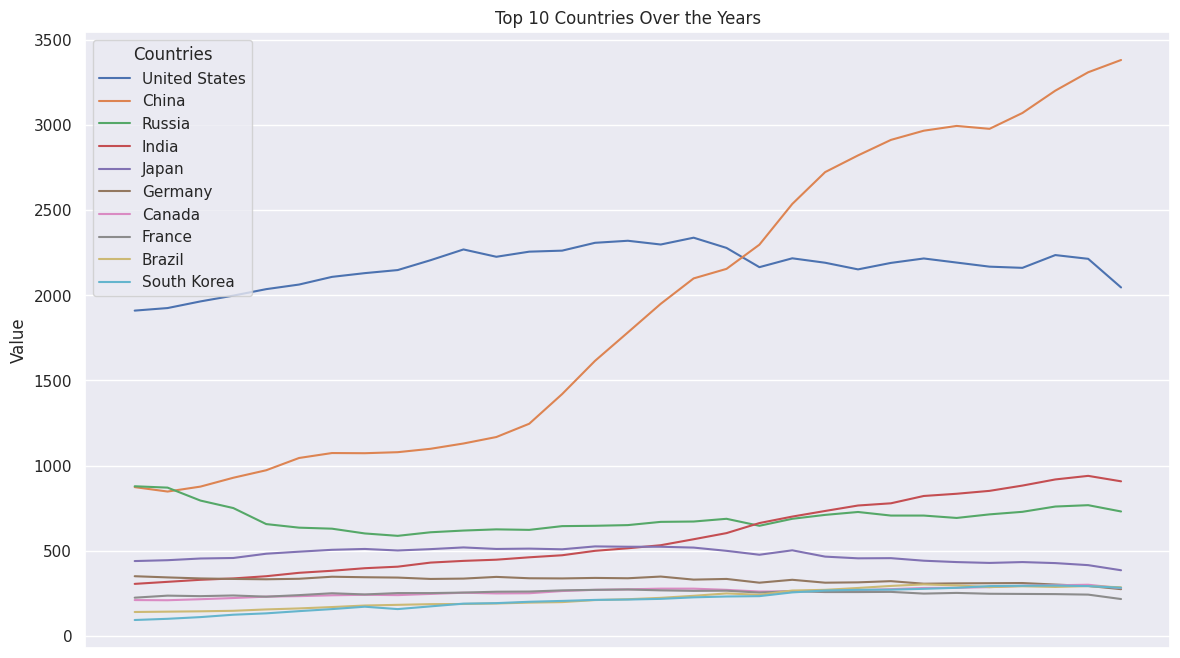

In [ ]:
country_sums = df_country_cons.drop(columns=['Year']).sum()


# Identify top 10 countries
top_10_countries = country_sums.nlargest(10).index.tolist()

top_10_df = df_country_cons[['Year'] + top_10_countries]

# Plot line chart
plt.figure(figsize=(14, 8))
for country in top_10_countries:
    plt.plot(top_10_df['Year'], top_10_df[country], label=country)

plt.gca().xaxis.set_visible(False)
plt.ylabel('Value')
plt.title('Top 10 Countries Over the Years')
plt.legend(title='Countries')
plt.grid(True)
plt.show()

In [ ]:
df_country_cons.to_csv("Country Consumption Modified.csv")

In [ ]:
df_renewable.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [ ]:
df_renewable.isnull().sum()

,0
Year,0
Hydro(TWh),0
Biofuel(TWh),0
Solar PV (TWh),0
Geothermal (TWh),0


In [ ]:
round(df_renewable.isna().mean() * 100 ,2)

,0
Year,0.0
Hydro(TWh),0.0
Biofuel(TWh),0.0
Solar PV (TWh),0.0
Geothermal (TWh),0.0


In [ ]:
df_renewable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              28 non-null     int64  
 1   Hydro(TWh)        28 non-null     float64
 2   Biofuel(TWh)      28 non-null     float64
 3   Solar PV (TWh)    28 non-null     float64
 4   Geothermal (TWh)  28 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [ ]:
df_renewable['Year'] = df_renewable['Year'].astype(str)
df_renewable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              28 non-null     object 
 1   Hydro(TWh)        28 non-null     float64
 2   Biofuel(TWh)      28 non-null     float64
 3   Solar PV (TWh)    28 non-null     float64
 4   Geothermal (TWh)  28 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [ ]:
df_renewable.describe()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
count,28.000000,28.000000,28.000000,28.000000
mean,2974.167500,245.032500,57.430000,57.014286
std,595.936814,329.275399,113.343588,14.850555
min,2191.670000,3.880000,0.090000,36.420000
25%,2598.630000,11.422500,0.257500,42.330000
50%,2718.725000,74.330000,2.335000,55.295000
75%,3298.897500,365.037500,40.105000,68.397500
max,4197.290000,1127.310000,443.550000,85.340000


In [ ]:
# Check duplicates
df_renewable.duplicated().sum()

0

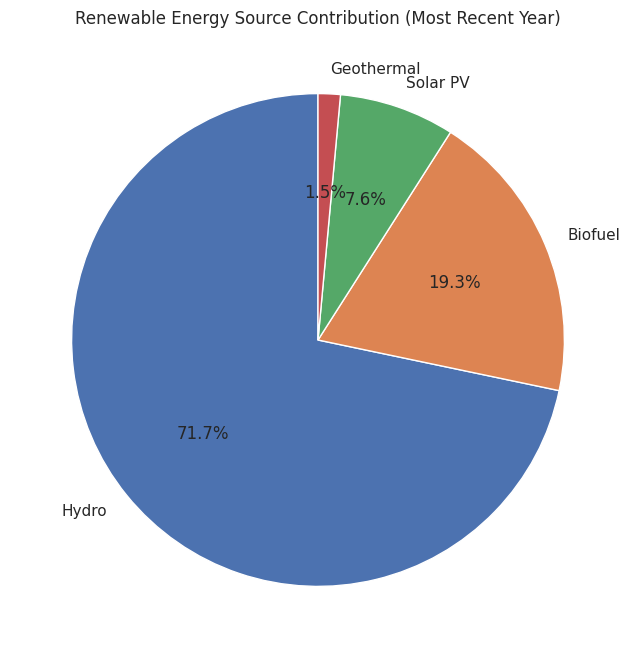

In [ ]:
recent_year_data = df_renewable[df_renewable['Year'] == df_renewable['Year'].max()][['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']]
plt.figure(figsize=(10, 8))
plt.pie(recent_year_data.values[0], labels=['Hydro', 'Biofuel', 'Solar PV', 'Geothermal'], autopct='%1.1f%%', startangle=90)
Title = plt.title('Renewable Energy Source Contribution (Most Recent Year)')

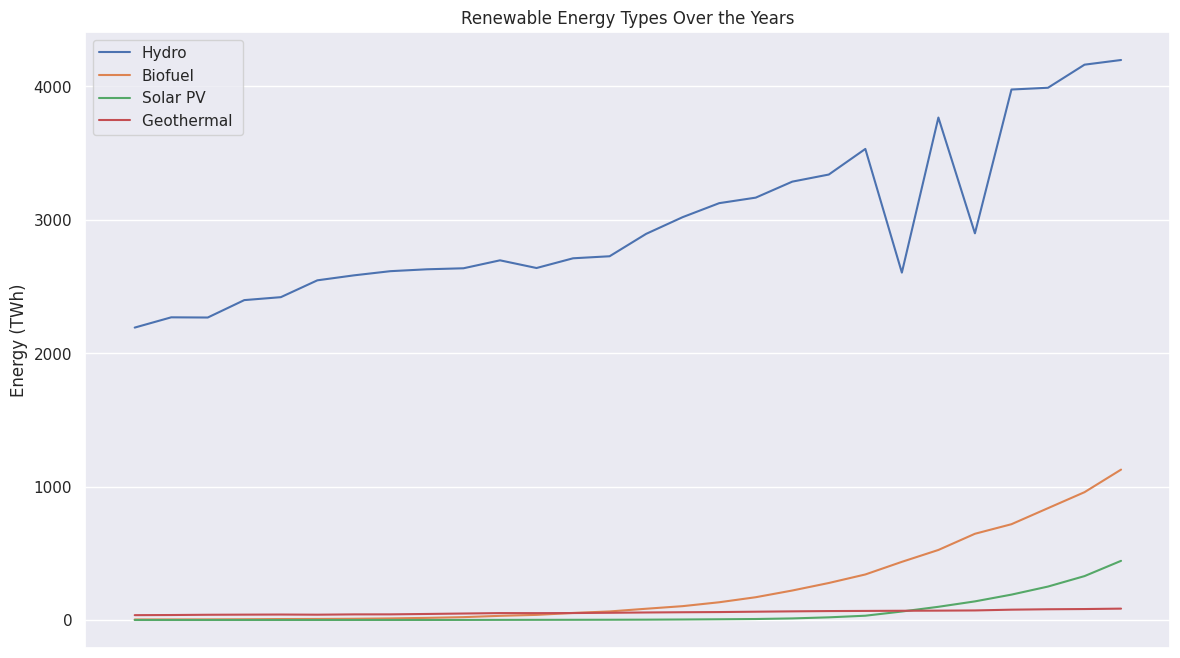

In [ ]:
renewable_types = ['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']

plt.figure(figsize=(14, 8))

for rtype in renewable_types:
    plt.plot(df_renewable['Year'], df_renewable[rtype], label=rtype.replace('(TWh)', ''))

plt.gca().xaxis.set_visible(False)
plt.ylabel('Energy (TWh)')
plt.title('Renewable Energy Types Over the Years')
plt.legend()
plt.show()

In [ ]:
df_renewable.to_csv("Renewable_PowerGeneration Modified.csv")

In [ ]:
df_NONREN_totalP.head(8)

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04
5,Municipal Wastes,74.05
6,Others,36.02
7,Total,19448.16


In [ ]:
# return a new dataframe by dropping a row 'c' from dataframe
df_NONREN_totalP =df_NONREN_totalP.drop(7)
print(df_NONREN_totalP)

  Mode of Generation  Contribution (TWh)
0               Coal             9863.33
1        Natural Gas             5882.82
2           Nuclear              2636.03
3                Oil              841.87
4              Waste              114.04
5   Municipal Wastes               74.05
6             Others               36.02


In [ ]:
df_NONREN_totalP.isnull().sum()

,0
Mode of Generation,0
Contribution (TWh),0


In [ ]:
df_NONREN_totalP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mode of Generation  7 non-null      object 
 1   Contribution (TWh)  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


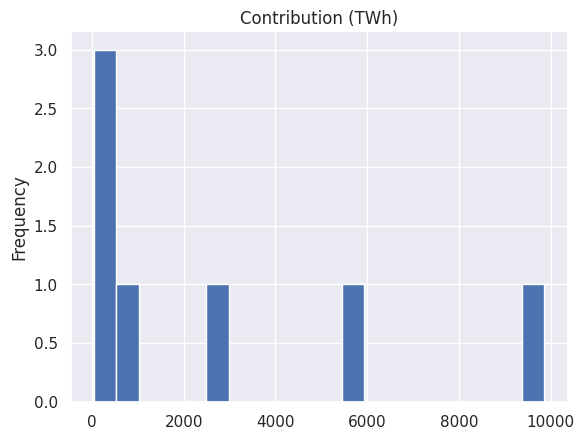

In [ ]:
df_NONREN_totalP['Contribution (TWh)'].plot(kind='hist', bins=20, title='Contribution (TWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_NONREN_totalP.to_csv("NonRenewables_TotalPowerGeneration Modified.csv")

In [ ]:
df_REN_totalP.head(9)

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02
7,Tidal,19448.16
8,Total,6384.25


In [ ]:
df_REN_totalP =df_REN_totalP.drop(8)
print(df_REN_totalP)

  Mode of Generation  Contribution (TWh)
0              Hydro             9863.33
1               Wind             5882.82
2            Biofuel             2636.03
3           Solar PV              841.87
4         Geothermal              114.04
5    Renewable waste               74.05
6      Solar Thermal               36.02
7              Tidal            19448.16


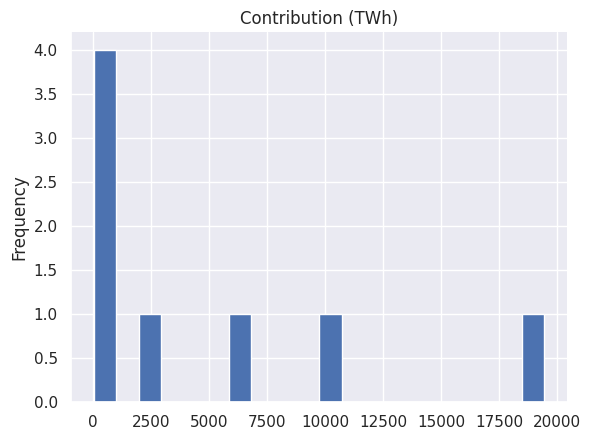

In [ ]:
df_REN_totalP['Contribution (TWh)'].plot(kind='hist', bins=20, title='Contribution (TWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_REN_totalP.to_csv("Renewables_TotalPowerGeneration.csv Modified.csv")

In [ ]:
dftop20.head()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Country,,,,
China,1189.84,295.02,79.43,0.125
USA,315.62,277.91,58.95,18.960
Brazil,370.90,42.37,52.25,0.000
Canada,383.48,29.65,7.12,0.000
India,141.80,51.06,43.76,0.000


In [ ]:
dftop20.tail()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Country,,,,
Indonesia,18.63,0.0006,0.23,12.7600
Thailand,9.52,1.1000,15.38,0.0001
South Korea,7.28,2.4600,6.82,0.0000
Iran,15.05,0.3000,0.02,0.0000
Taiwan,8.87,1.7300,0.11,0.0000


In [ ]:
del df['Total(TWh)']

In [ ]:
#checking for null values
dftop20.isnull().sum()

,0
Hydro(TWh),0
Biofuel(TWh),0
Solar PV (TWh),0
Geothermal (TWh),0


In [ ]:
dftop20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, China to Taiwan
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hydro(TWh)        20 non-null     float64
 1   Biofuel(TWh)      20 non-null     float64
 2   Solar PV (TWh)    20 non-null     float64
 3   Geothermal (TWh)  20 non-null     float64
dtypes: float64(4)
memory usage: 1.3+ KB


In [ ]:
# Check duplicates
dftop20.duplicated().sum()

0

In [ ]:
# prompt: use country column as the index

# Assuming df_country_cons is the DataFrame you want to modify.
dftop20 = dftop20.set_index('Country')

KeyError: "None of ['Country'] are in the columns"

In [ ]:
#Describe
dftop20.describe(include='all')

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
count,20.000000,20.000000,20.000000,20.000000
mean,151.849500,51.149530,19.828000,2.667255
std,273.122956,85.071233,23.726242,5.127413
min,7.280000,0.000600,0.020000,0.000000
25%,15.777500,2.277500,2.442500,0.000000
50%,43.830000,18.685000,6.970000,0.062550
75%,153.132500,50.872500,35.000000,3.170000
max,1189.840000,295.020000,79.430000,18.960000


In [ ]:
dftop20.corr()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Hydro(TWh),1.000000,0.743562,0.700464,-0.019507
Biofuel(TWh),0.743562,1.000000,0.837184,0.353691
Solar PV (TWh),0.700464,0.837184,1.000000,0.111576
Geothermal (TWh),-0.019507,0.353691,0.111576,1.000000


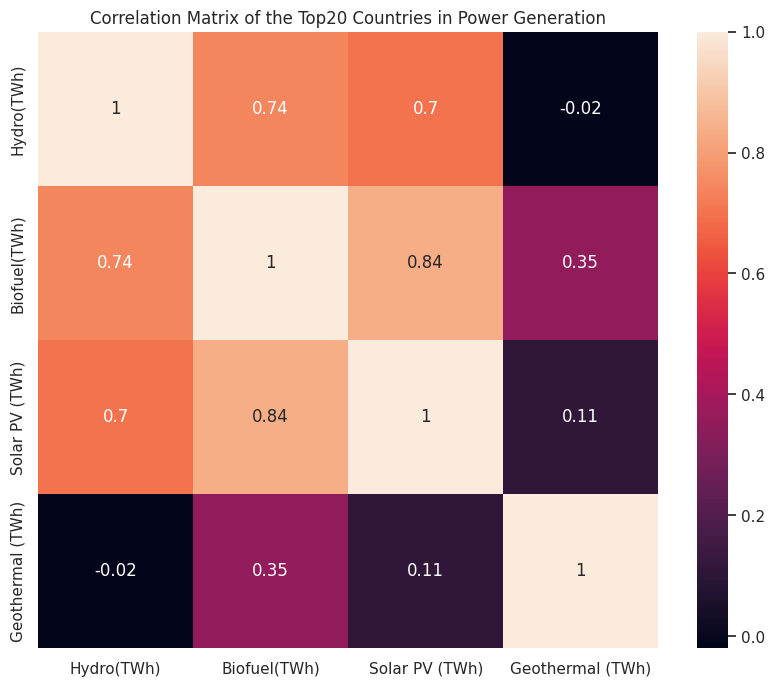

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = dftop20.corr()
sns.heatmap(corr_matrix, annot=True)
Title = plt.title('Correlation Matrix of the Top20 Countries in Power Generation')

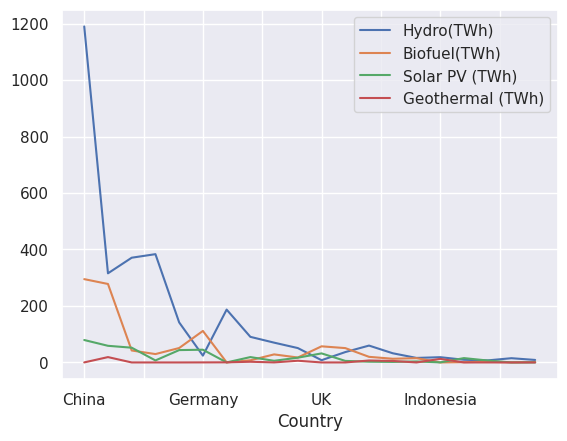

In [ ]:
dftop20.plot()
plt.show()

In [ ]:
dftop20.to_csv("Top20CountriesPowerGeneration Modified.csv")